                                          利用Logistic回归的信用卡盗刷案例分析

In [148]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
##导入数据
dataset=pd.read_csv(r"E:\学习资料\金融大数据\信用卡盗刷预测模型\信用卡数据.csv",encoding="gbk")
dataset.head()

,Unnamed: 0,传输等级,卡等级,线上交易,ip与设备地址匹配,ip在国外,ip为空,设备编码为空,ip异城市,设备异省,设备异城市,高风险交易标识,大额交易,异常时间,ip在高风险区域
0,419805,6.0,2,0,0,1,0,0,0,2,0,1,0,0,0
1,10355,6.0,1,0,0,0,0,0,0,2,0,0,0,0,0
2,174534,6.0,1,0,0,1,1,0,0,2,0,1,0,0,0
3,428222,6.0,1,0,0,0,0,0,0,2,0,1,0,0,0
4,156604,NaN,1,0,0,1,1,0,0,2,0,1,0,0,0


In [15]:
#数据预处理
dataset.isnull().sum()

Unnamed: 0    0
传输等级          3
卡等级           0
线上交易          0
ip与设备地址匹配     0
ip在国外         0
ip为空          0
设备编码为空        0
ip异城市         0
设备异省          0
设备异城市         0
高风险交易标识       0
大额交易          0
异常时间          0
ip在高风险区域      0
dtype: int64

In [146]:
#去掉空值
dataset=dataset.dropna()

In [117]:
dataset.isnull().sum()

Unnamed: 0    0
传输等级          0
卡等级           0
线上交易          0
ip与设备地址匹配     0
ip在国外         0
ip为空          0
设备编码为空        0
ip异城市         0
设备异省          0
设备异城市         0
高风险交易标识       0
大额交易          0
异常时间          0
ip在高风险区域      0
dtype: int64

In [119]:
dataset.groupby("高风险交易标识").count()

,Unnamed: 0,传输等级,卡等级,线上交易,ip与设备地址匹配,ip在国外,ip为空,设备编码为空,ip异城市,设备异省,设备异城市,大额交易,异常时间,ip在高风险区域
高风险交易标识,,,,,,,,,,,,,,
0,34723,34723,34723,34723,34723,34723,34723,34723,34723,34723,34723,34723,34723,34723
1,65269,65269,65269,65269,65269,65269,65269,65269,65269,65269,65269,65269,65269,65269


1关联性分析：
皮尔森相关系数常用来描述变量之间的关联程度，当皮尔森相关系数为正时，表示变量为正相关，反之为负相关。
保留相关系数较大的，去除相关系数少的

In [122]:
##获得数据框的所有列名
cols=list(dataset.keys())

In [124]:
new_dataset=dataset[cols[1:]]##去掉第一个列
datacorr=new_dataset.corr()["高风险交易标识"]##计算所有变量与变量target之间的相关系数
lst_corr=datacorr.tolist()##将相关系数保存到列表里

In [126]:
##选择与变量target的相关系数大于0.02的变量用来建立模型
new_cols=cols[1:]
final_cols=[]##保存符合要求的变量名
for i in range(len(lst_corr)):
    if lst_corr[i]>0.02 or lst_corr[i]<-0.02:
        final_cols.append(new_cols[i])

In [128]:
"高风险交易标识" in final_cols

True

In [130]:
final_cols=[i for i in final_cols if i!="高风险交易标识"]
X=dataset[final_cols]
Y=dataset["高风险交易标识"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)##分割数据集

In [132]:
logistic=LogisticRegression(fit_intercept=True,max_iter=10000)##括号里含义是加上截距项的计算(一般情况下都是加上的)
#其中max_iter用来设置最大训练次数以防止训练次数过小导致模型训练到最后无法收敛出最终结果！！！

In [134]:
#模型训练
model=logistic.fit(x_train,y_train)

In [136]:
##用训练好的模型进行预测
pre_y=model.predict(x_test)
pre_y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [138]:
##计算残差平方和
res=(y_test==pre_y).mean()
res

0.8658432921646082

In [140]:
##计算模型准确度##
point=accuracy_score(y_test,pre_y)
point

0.8658432921646082

In [142]:
##计算混淆矩阵
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,pre_y)
matrix

array([[ 5258,  1697],
       [  986, 12058]], dtype=int64)

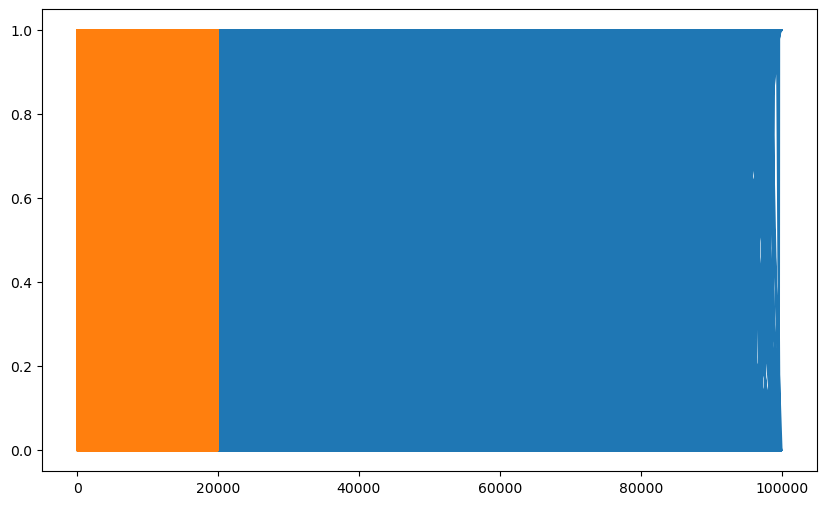

In [150]:
plt.figure(figsize=(10, 6))  # 设置图像大小
plt.plot(y_test, label='True Labels (y_test)')  # 绘制真实标签的线性图
plt.plot(pre_y, label='Predicted Labels (pre_y)')  # 绘制预测标签的线性图